### Newton’s Polynomial Interpolation

Write a program to calculate the interpolation polynomial in Newtonian form and its derivative. Program requirements:
1. Implement a function that takes as input $[x_0, x_1, \dots, x_n]$, $[f(x_0), f(x_1), \dots, f(x_n)]$, $[y_0, y_1, \dots, y_t]$ - points at which you want to calculate the polynomial.
2. Function should calculate array of [`divided differences`](https://en.wikipedia.org/wiki/Divided_differences), array of values of interpolation polynomial in dots, and array of 1-st derivative of the interpolation poly.
3. Difficulty of the method: $\mathcal{O}(n)$
4. For [`Chebyshev nodes`](https://en.wikipedia.org/wiki/Chebyshev_nodes) and uniform nodes function should evoke the implemented function and draw two pics:
    - Graph of the $f$ and the poly $L_n$ and values at nodes
    - Graph of the $f'$ and $L_n'$

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

plt.style.use('Solarize_Light2')

%matplotlib inline

### Method and Divided differences

We will calculate the divided differences according to the [wiki article](https://en.wikipedia.org/wiki/Divided_differences).

In [50]:
def div_diffs(x, y):
    sz = len(y)
    
    f = np.zeros([sz, sz])
    f[:,0] = y    
    for j in range(1, sz):
        for i in range(sz - j):
            f[i][j] = (f[i+1][j-1] - f[i][j-1]) / (x[i+j] - x[i])
            
    return f

Polynomial interpolation uses divided differences, x array and array of points where we want to know values of approximation.

In [49]:
def newton_poly(f, x, wanted):
    sz = len(x) - 1 
    ans = f[sz]
    for k in range(1, sz + 1):
        ans = f[sz - k] + (wanted - x[sz-k]) * ans
    return ans

In [67]:
def NewtonPolyInterpolation(xs, fs, wanted):
    # get the divided difference coef
    f = div_diffs(xs, fs)[0, :]
    pred = newton_poly(f, xs, wanted)
    x = Symbol('x')
    y = 0
    for deg in range (len(f)):
        y += f[deg] * np.prod(x - xs)
    return f, pred, y

In [93]:
funk_1_grad = [-4, -2, 0, 2, 4]

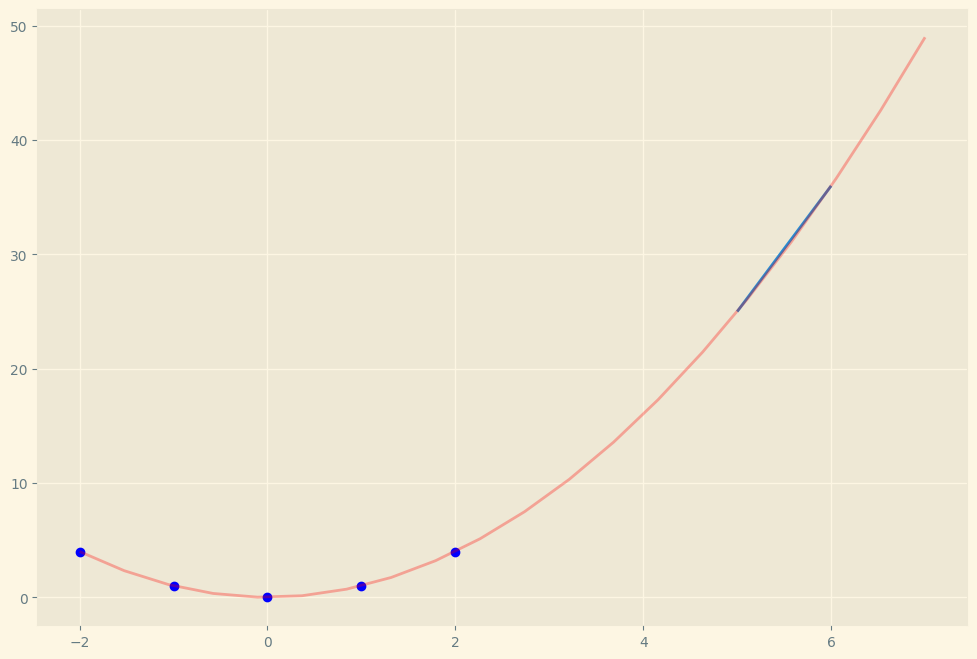

In [91]:
func_1      = lambda x: x * x
func_1_grad = lambda x: 2 * x

x2 = np.array([-2, -1, 0, 1, 2])

f_at_x2 = np.array(func_1(x2))
wanted2 = np.array([5,6])

f, pred, y = NewtonPolyInterpolation(x2, f_at_x2, wanted2)
yprime = y.diff(Symbol('x'))

plt.figure(figsize = (12, 8))
plt.plot(x2, f_at_x2, 'bo')
plt.plot(wanted2, pred)
plt.plot(np.linspace(-2,7, 20), func_1(np.linspace(-2,7, 20)), color='red', alpha=0.3)
plt.show()

In [81]:
f_dif = lambdify(Symbol('x'), yprime, 'numpy')
dif_dots = [f_dif(xi) for xi in x2]

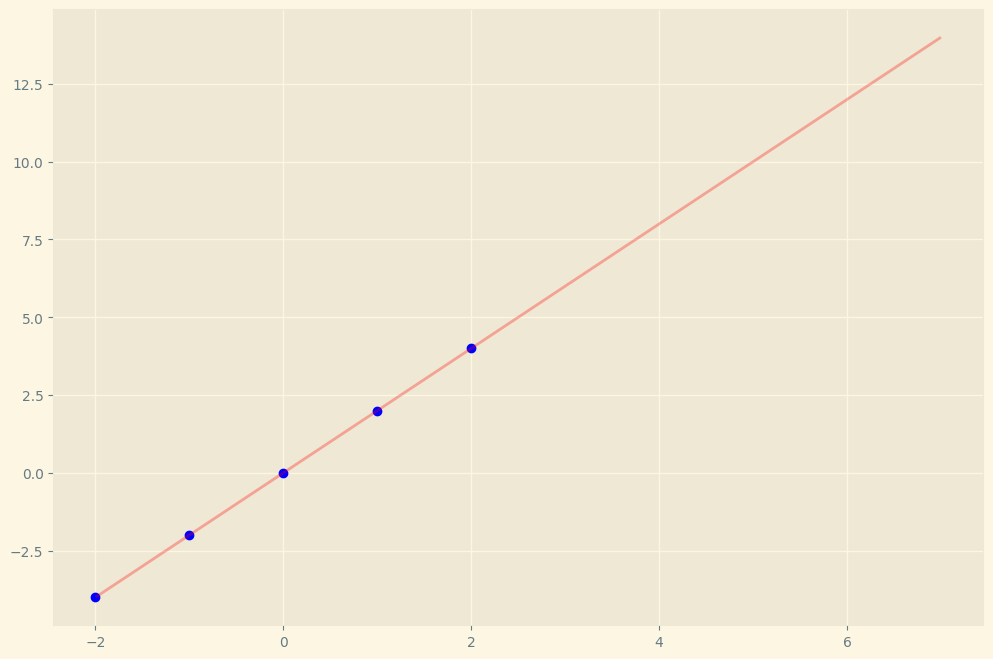

In [99]:
plt.figure(figsize = (12, 8))
plt.plot(x2, funk_1_grad, 'bo')
plt.plot(np.linspace(-2,7, 20), func_1_grad(np.linspace(-2,7, 20)), color='red', alpha=0.3)
plt.show()

## References
- Newton Interpolation wiki [$^{[1]}$](https://en.wikipedia.org/wiki/Newton_polynomial)
- Simple implementation [$^{[2]}$](https://gist.github.com/vene/921554)